In [269]:
import tensorflow as tf
from keras.layers import Dense, Input

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [270]:
from numpy.random import seed
seed(1)

In [271]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### 1) Import Datasets

In [272]:
X_train = pd.read_csv('train_trans.csv')
y_train = X_train['FLAG']
X_val = pd.read_csv('val_trans.csv')
y_val = X_val['FLAG']
X_test = pd.read_csv('test_trans.csv')
y_test = X_test['FLAG']

In [273]:
X_train.shape

(7970, 64)

### 2.1) NN with 1 hidden layer and 45 neurons

In [280]:
H = 45

model1 = tf.keras.Sequential()
model1.add(Input(shape=(64,)))
model1.add(Dense(units=H,activation='relu'))
model1.add(Dense(units=1,activation='sigmoid'))

model1.compile(optimizer="Adam", loss='binary_crossentropy', metrics=["accuracy"])
model1.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 45)                2925      
                                                                 
 dense_109 (Dense)           (None, 1)                 46        
                                                                 
Total params: 2,971
Trainable params: 2,971
Non-trainable params: 0
_________________________________________________________________


##### 2.2) Train and find optimal CT

 10/250 [>.............................] - ETA: 1s - loss: 164.1953 - accuracy: 0.7906 

2022-11-11 17:01:20.490387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


115/250 [============>.................] - ETA: 0s

2022-11-11 17:01:21.746603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 0s 1ms/step
0.9994578072604337
Threshold value is: 0.99999976


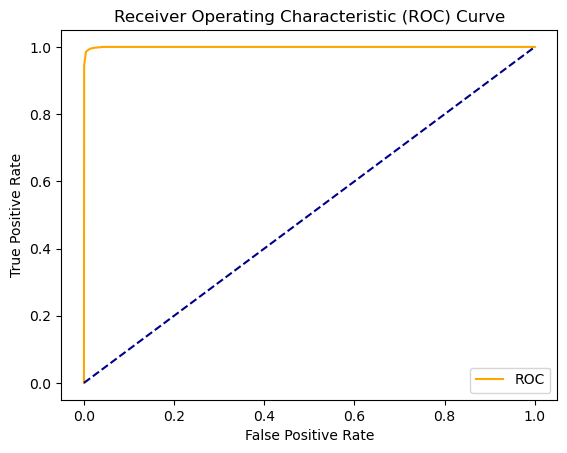

In [281]:
model1.fit(X_train,y_train)
y_scores = model1.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
print(roc_auc_score(y_train, y_scores))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

##### 2.3) Compare training and validation results

In [282]:
y_pred = (model1.predict(X_train) > optimal_threshold).astype('float')
print(classification_report(y_train,y_pred))

250/250 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6205
           1       0.98      0.99      0.98      1765

    accuracy                           0.99      7970
   macro avg       0.99      0.99      0.99      7970
weighted avg       0.99      0.99      0.99      7970



In [283]:
y_pred = (model1.predict(X_val) > optimal_threshold).astype('float')
print(classification_report(y_val,y_pred))

28/28 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       690
           1       0.98      0.99      0.99       196

    accuracy                           0.99       886
   macro avg       0.99      0.99      0.99       886
weighted avg       0.99      0.99      0.99       886



### 3.1) NN with multiple hidden layers

In [288]:
H = 45

model2 = tf.keras.Sequential()
model2.add(Input(shape=(64,)))
model2.add(Dense(units=H,activation='relu'))
model2.add(Dense(units=H,activation='relu'))
model2.add(Dense(units=H,activation='relu'))
model2.add(Dense(units=H,activation='relu'))
model2.add(Dense(units=1,activation='sigmoid'))

model2.compile(optimizer="Adam", loss='binary_crossentropy', metrics=["accuracy"])
model2.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_115 (Dense)           (None, 45)                2925      
                                                                 
 dense_116 (Dense)           (None, 45)                2070      
                                                                 
 dense_117 (Dense)           (None, 45)                2070      
                                                                 
 dense_118 (Dense)           (None, 45)                2070      
                                                                 
 dense_119 (Dense)           (None, 1)                 46        
                                                                 
Total params: 9,181
Trainable params: 9,181
Non-trainable params: 0
_________________________________________________________________


##### 3.2) Train and find optimal CT

  1/250 [..............................] - ETA: 1:13 - loss: 16.5181 - accuracy: 0.7500

2022-11-11 17:02:11.304817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


107/250 [===========>..................] - ETA: 0s

2022-11-11 17:02:12.953077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 0s 1ms/step
roc_score: 0.9954803879718677
Threshold value is: 0.88435775


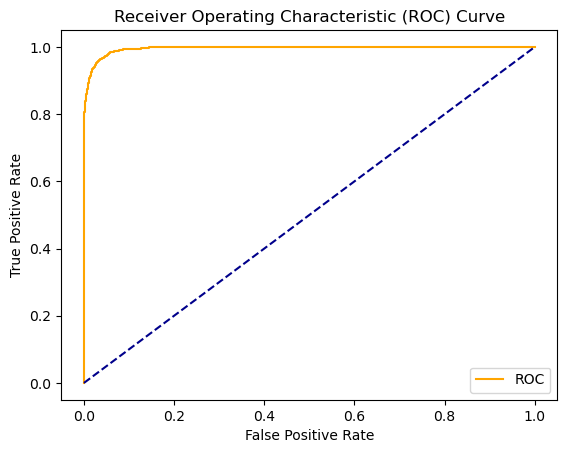

In [289]:
model2.fit(X_train,y_train)
y_scores = model2.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
print("roc_score:",roc_auc_score(y_train, y_scores))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

##### 3.3) Compare training and validation results

In [290]:
y_pred = (model2.predict(X_train) > optimal_threshold).astype('float')
print(classification_report(y_train,y_pred))

250/250 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      6205
           1       0.90      0.96      0.93      1765

    accuracy                           0.97      7970
   macro avg       0.94      0.96      0.95      7970
weighted avg       0.97      0.97      0.97      7970



In [291]:
y_pred = (model2.predict(X_val) > optimal_threshold).astype('float')
print(classification_report(y_val,y_pred))

28/28 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       690
           1       0.90      0.96      0.93       196

    accuracy                           0.97       886
   macro avg       0.94      0.97      0.95       886
weighted avg       0.97      0.97      0.97       886



### 4.1) NN with 6 hidden layers and 45 neurons

In [293]:
H = 45

model3 = tf.keras.Sequential()
model3.add(Input(shape=(64,)))
model3.add(Dense(units=H,activation='relu'))
model3.add(Dense(units=H,activation='relu'))
model3.add(Dense(units=H,activation='relu'))
model3.add(Dense(units=H,activation='relu'))
model3.add(Dense(units=H,activation='relu'))
model3.add(Dense(units=H,activation='relu'))
model3.add(Dense(units=1,activation='sigmoid'))

model3.compile(optimizer="Adam", loss='binary_crossentropy', metrics=["accuracy"])
model3.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_127 (Dense)           (None, 45)                2925      
                                                                 
 dense_128 (Dense)           (None, 45)                2070      
                                                                 
 dense_129 (Dense)           (None, 45)                2070      
                                                                 
 dense_130 (Dense)           (None, 45)                2070      
                                                                 
 dense_131 (Dense)           (None, 45)                2070      
                                                                 
 dense_132 (Dense)           (None, 45)                2070      
                                                                 
 dense_133 (Dense)           (None, 1)               

##### 2.2) Train and find optimal CT

250/250 [==============================] - 0s 2ms/step
roc_score: 0.9996953932335478
Threshold value is: 0.98853034


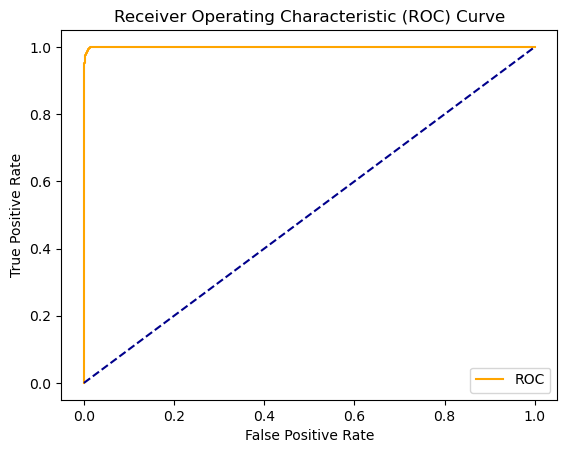

In [295]:
model3.fit(X_train,y_train)
y_scores = model3.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
print("roc_score:",roc_auc_score(y_train, y_scores))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

##### 2.3) Compare training and validation results

In [298]:
y_pred = (model3.predict(X_train) > optimal_threshold).astype('float')
print(classification_report(y_train,y_pred))

250/250 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6205
           1       0.95      1.00      0.98      1765

    accuracy                           0.99      7970
   macro avg       0.98      0.99      0.98      7970
weighted avg       0.99      0.99      0.99      7970



In [299]:
y_pred = (model3.predict(X_val) > optimal_threshold).astype('float')
print(classification_report(y_val,y_pred))

28/28 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       690
           1       0.95      1.00      0.98       196

    accuracy                           0.99       886
   macro avg       0.98      0.99      0.98       886
weighted avg       0.99      0.99      0.99       886



Results are not very robust, get different results each time we run and sometimes result can be very bad